In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 4.1 MB/s eta 0:00:00


In [2]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 60.3/60.3 kB 160.0 kB/s eta 0:00:00
     ------------------------------------ 112.2/112.2 kB 383.2 kB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 1.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-11,291.790009,292.609985,285.000000,285.260010,282.488708,34569300
1,2022-04-12,289.239990,290.739990,280.489990,282.059998,279.319794,30966700
2,2022-04-13,282.730011,288.579987,281.299988,287.619995,284.825806,21907200
3,2022-04-14,288.089996,288.309998,279.320007,279.829987,277.111450,28221600
4,2022-04-18,278.910004,282.459991,278.339996,280.519989,277.794739,20778000


In [10]:
df.shape

(249, 7)

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,256.833012,260.116546,253.600602,256.937510,255.681270,2.979323e+07
std,17.933402,17.849511,17.704998,17.864738,17.583538,1.026352e+07
min,217.550003,220.410004,213.429993,214.250000,213.114120,9.200800e+06
25%,243.080002,245.300003,240.110001,242.259995,241.435272,2.278830e+07
50%,256.299988,259.559998,252.529999,255.020004,254.382843,2.785290e+07
75%,271.690002,274.600006,267.220001,270.410004,269.320007,3.362030e+07
max,291.989990,294.179993,290.420013,293.470001,291.600006,8.610200e+07


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


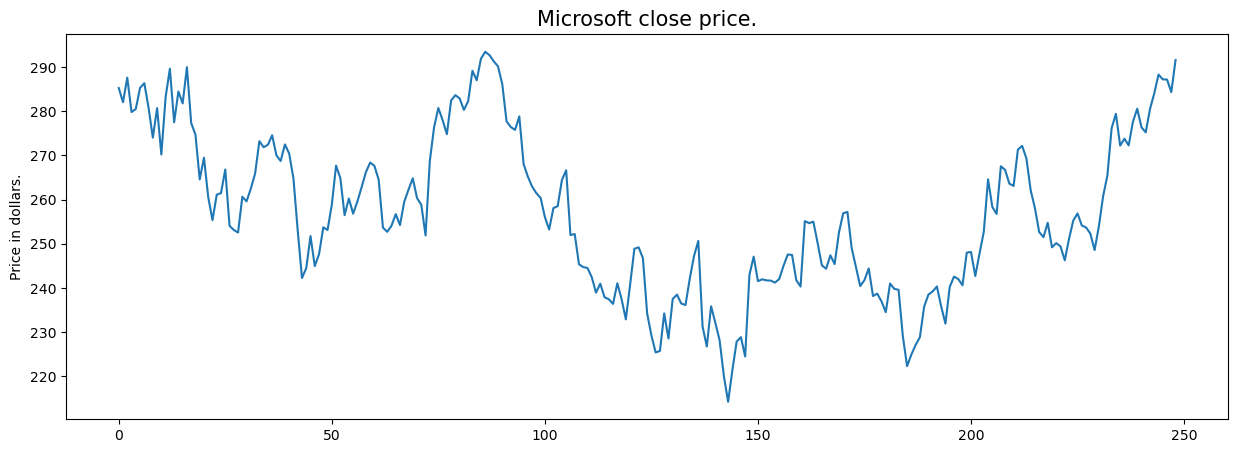

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Microsoft close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-11,291.790009,292.609985,285.000000,285.260010,282.488708,34569300
1,2022-04-12,289.239990,290.739990,280.489990,282.059998,279.319794,30966700
2,2022-04-13,282.730011,288.579987,281.299988,287.619995,284.825806,21907200
3,2022-04-14,288.089996,288.309998,279.320007,279.829987,277.111450,28221600
4,2022-04-18,278.910004,282.459991,278.339996,280.519989,277.794739,20778000


In [16]:
df[df['Close'] == df['Adj Close']].shape

(36, 7)

In [17]:
df=df.drop(['Adj Close'], axis=1)

In [18]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

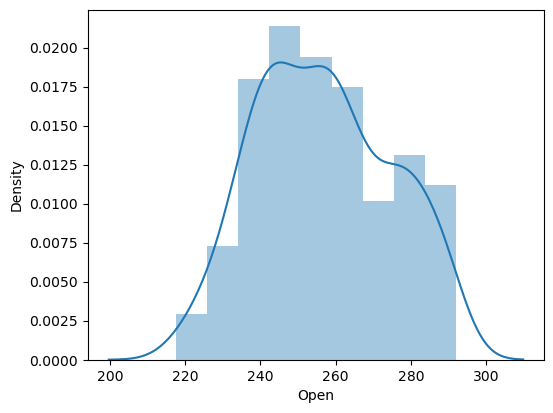

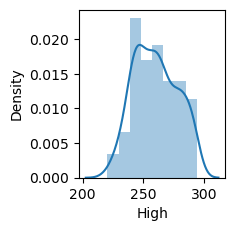

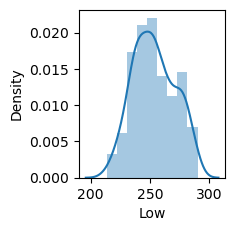

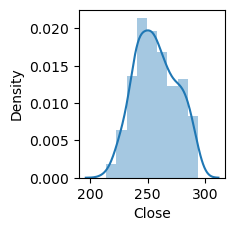

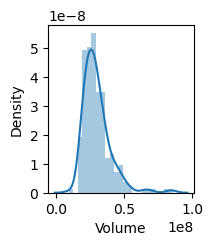

In [19]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
    plt.show()

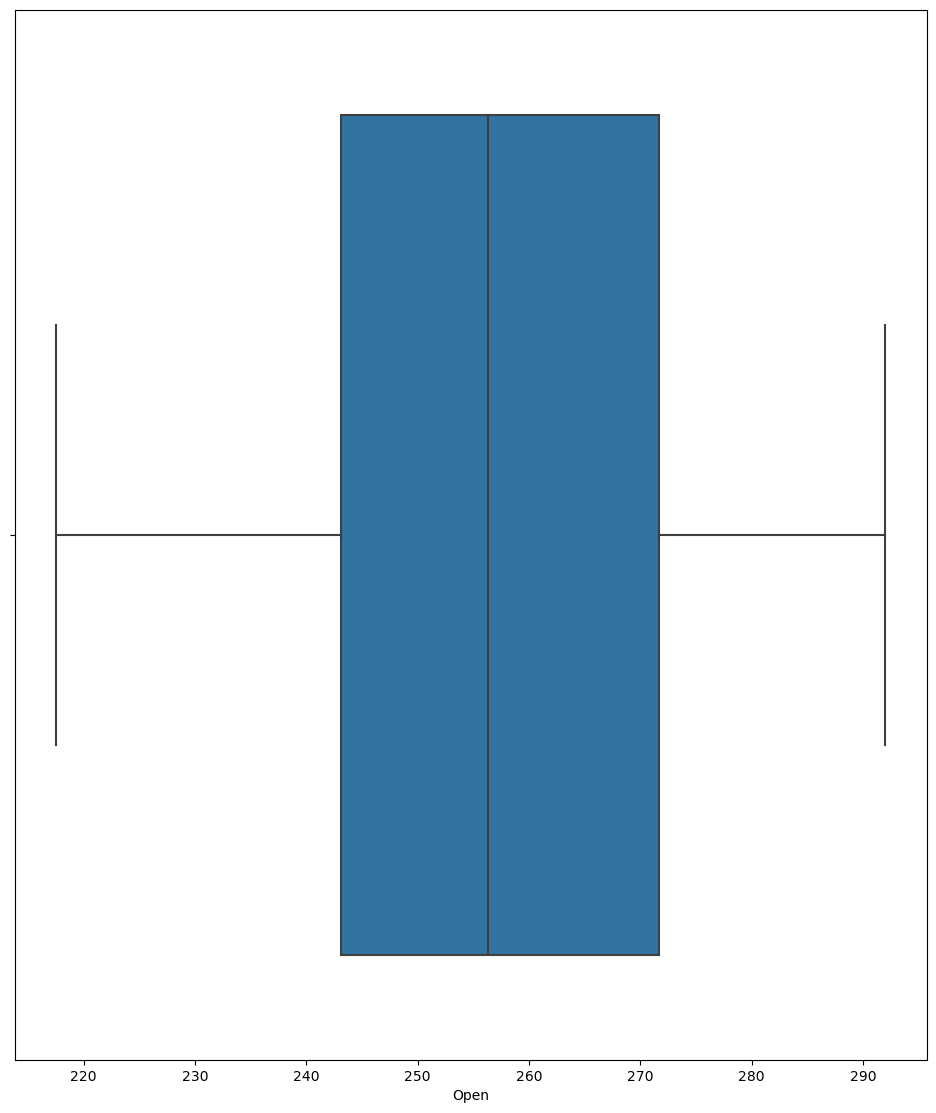

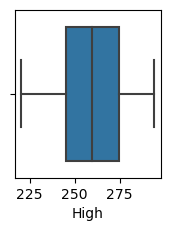

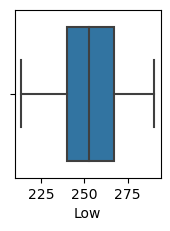

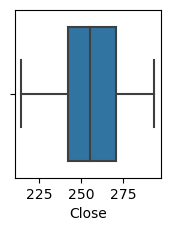

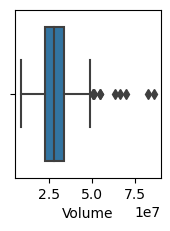

In [20]:
plt.subplots(figsize=(40,30))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
    plt.show()

In [21]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'],1,0)

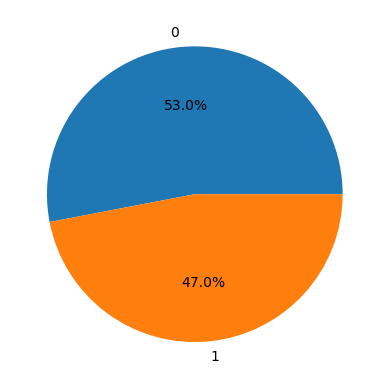

In [22]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

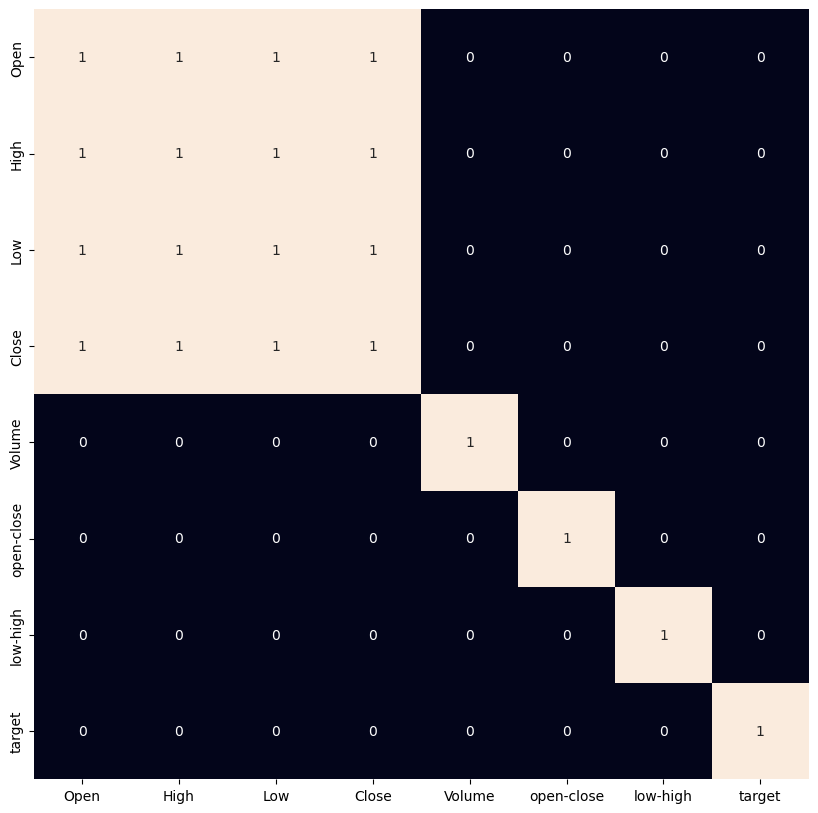

In [23]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [24]:
features = df[['open-close', 'low-high']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape,X_valid.shape)

(224, 2) (25, 2)


In [25]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(
	Y_train, models[i].predict_proba(X_train)[:,1])) 
    print('Validation Accuracy : ', metrics.roc_auc_score(
	Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5070433872655559
Validation Accuracy :  0.5416666666666666

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.44691298398132495
Validation Accuracy :  0.5416666666666667

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accur

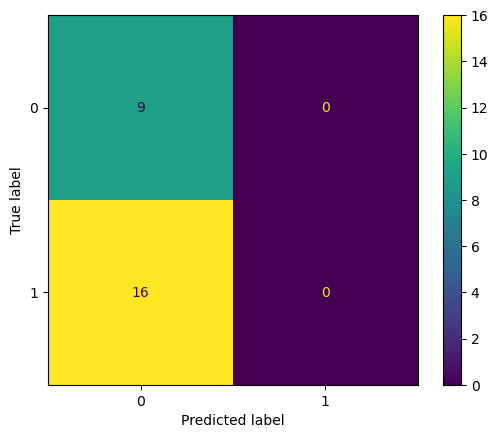

In [26]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()